## Import modules

In [262]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

In [263]:
df=pd.read_csv('bank-loan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [264]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


## Preprocessing the dataset

In [266]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [267]:
# Droping missing value rows
df=df.dropna()
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [268]:
print(df.shape)

(700, 9)


## Exploratory Data Analysis

In [269]:
df.groupby('default').mean()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
default,,,,,,,,
0.0,35.514507,1.659574,9.508704,8.945841,47.154739,8.679304,1.245493,2.773409
1.0,33.010929,1.901639,5.224044,6.393443,41.213115,14.727869,2.423865,3.862807


0.0    517
1.0    183
Name: default, dtype: int64


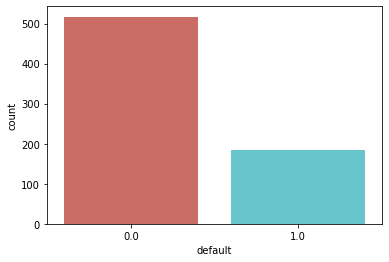

In [270]:
print(df['default'].value_counts())
sns.countplot(x='default',data=df, palette='hls')
plt.show()

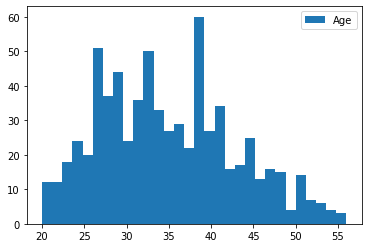

In [271]:
plt.hist(df.age,bins=30,label=['Age'])
plt.legend()

<AxesSubplot:xlabel='ed', ylabel='count'>

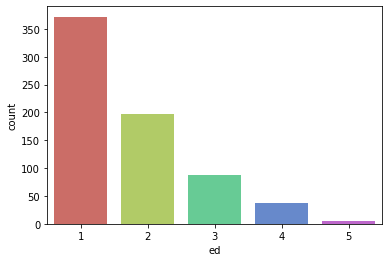

In [272]:
sns.countplot(x='ed',data=df, palette='hls')

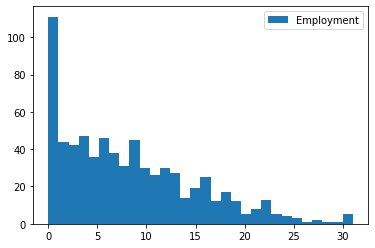

In [273]:
plt.hist(df.employ,bins=30,label=['Employment'])
plt.legend()

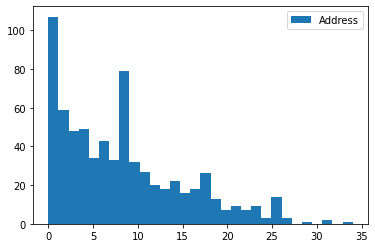

In [274]:
plt.hist(df.address,bins=30,label=['Address'])
plt.legend()

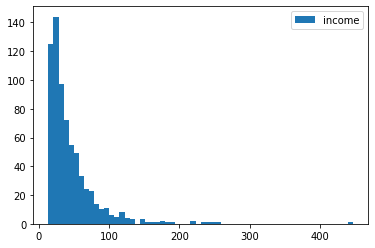

In [275]:
plt.hist(df.income,bins=60,label=['income'])
plt.legend()

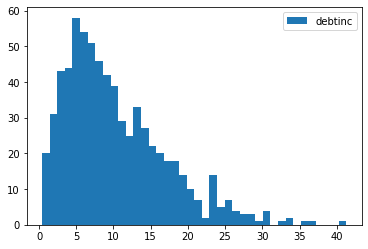

In [276]:
plt.hist(df.debtinc,bins=40,label=['debtinc'])
plt.legend()

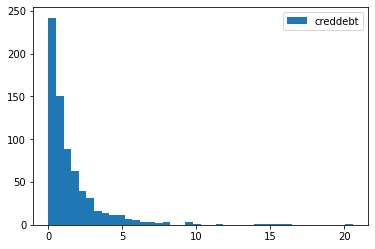

In [277]:
plt.hist(df.creddebt,bins=40,label=['creddebt'])
plt.legend()

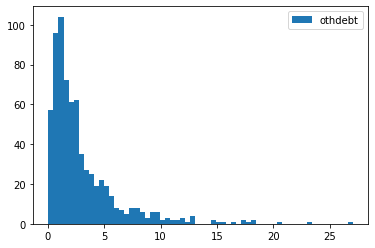

In [278]:
plt.hist(df.othdebt,bins=60,label=['othdebt'])
plt.legend()

## Outlier Detection

<AxesSubplot:>

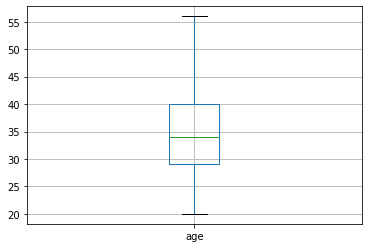

In [279]:
df.boxplot(column='age')

<AxesSubplot:>

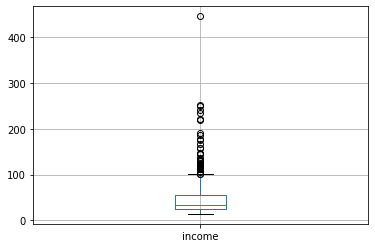

In [280]:
df.boxplot(column='income')

<AxesSubplot:title={'center':'income'}, xlabel='ed'>

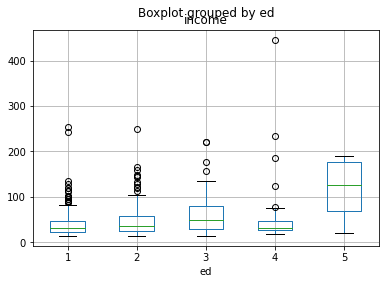

In [281]:
df.boxplot(column='income', by = 'ed')

<AxesSubplot:>

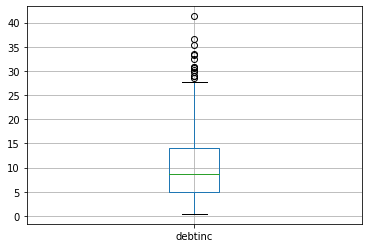

In [282]:
df.boxplot(column='debtinc')

<AxesSubplot:>

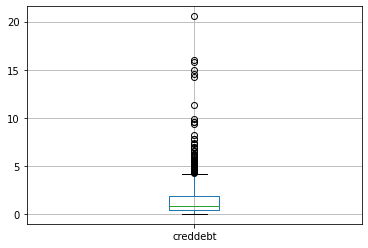

In [283]:
df.boxplot(column='creddebt')

<AxesSubplot:>

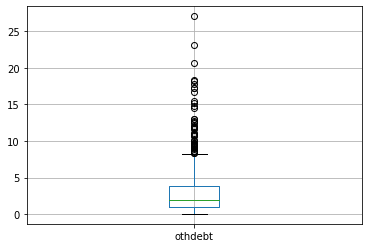

In [284]:
df.boxplot(column='othdebt')

## Log Transformation

<AxesSubplot:>

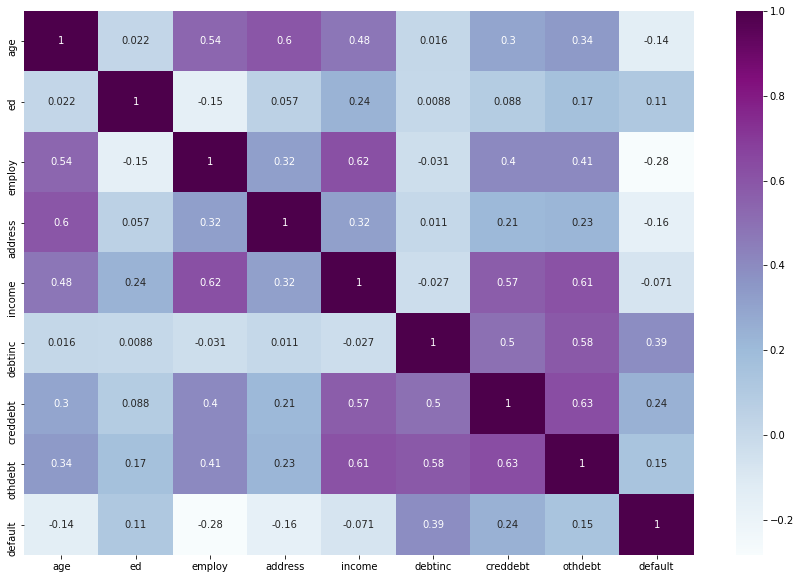

In [285]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

## SMOTE

In [286]:
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [287]:
df.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [288]:
X=df[['age','ed', 'employ', 'address', 'income', 'debtinc', 'creddebt','othdebt']]
y=df['default']
print('shape of x: {}'.format(X.shape))
print('shape of y: {}'.format(y.shape))

shape of x: (700, 8)
shape of y: (700,)


In [289]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [290]:
!pip install imblearn

In [291]:
print("Before OverSampling, counts of default '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of default '0': {} \n".format(sum(y_train == 0))) 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 0) 
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train) 

print('After OverSampling, the shape of x_train: {}'.format(x_train_sm.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_sm.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

Before OverSampling, counts of default '1': 128
Before OverSampling, counts of default '0': 362 

After OverSampling, the shape of x_train: (724, 8)
After OverSampling, the shape of y_train: (724,) 

After OverSampling, counts of label '1': 362
After OverSampling, counts of label '0': 362


C:\Users\Avinash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

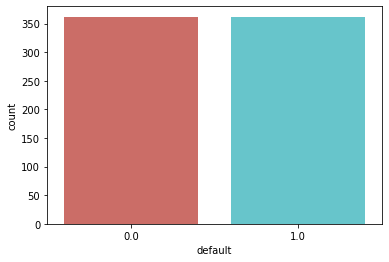

In [292]:
sns.countplot(y_train_sm,data=df, palette='hls')

## Model Selection

In [293]:
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    sm = SMOTE(random_state = 0) 
    x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train) 
    model.fit(x_train_sm, y_train_sm)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x_train_sm, y_train_sm, cv=5)
    print("Cross validation is",np.mean(score)*100)
    
    print("Before OverSampling, counts of default '1': {}".format(sum(y_train == 1))) 
    print("Before OverSampling, counts of default '0': {} \n".format(sum(y_train == 0))) 
    
    print('After OverSampling, the shape of x_train: {}'.format(x_train_sm.shape)) 
    print('After OverSampling, the shape of y_train: {} \n'.format(y_train_sm.shape)) 
  
    print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

In [294]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
classify(model, X, y)

Accuracy is 76.66666666666667
Cross validation is 79.15038314176245
Before OverSampling, counts of default '1': 128
Before OverSampling, counts of default '0': 362 

After OverSampling, the shape of x_train: (724, 8)
After OverSampling, the shape of y_train: (724,) 

After OverSampling, counts of label '1': 362
After OverSampling, counts of label '0': 362


In [295]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 68.57142857142857
Cross validation is 77.22126436781609
Before OverSampling, counts of default '1': 128
Before OverSampling, counts of default '0': 362 

After OverSampling, the shape of x_train: (724, 8)
After OverSampling, the shape of y_train: (724,) 

After OverSampling, counts of label '1': 362
After OverSampling, counts of label '0': 362


In [296]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 75.71428571428571
Cross validation is 85.08716475095784
Before OverSampling, counts of default '1': 128
Before OverSampling, counts of default '0': 362 

After OverSampling, the shape of x_train: (724, 8)
After OverSampling, the shape of y_train: (724,) 

After OverSampling, counts of label '1': 362
After OverSampling, counts of label '0': 362


In [297]:
from sklearn.svm import SVC
model = SVC(gamma='auto')
classify(model, X, y)

Accuracy is 72.38095238095238
Cross validation is 85.6455938697318
Before OverSampling, counts of default '1': 128
Before OverSampling, counts of default '0': 362 

After OverSampling, the shape of x_train: (724, 8)
After OverSampling, the shape of y_train: (724,) 

After OverSampling, counts of label '1': 362
After OverSampling, counts of label '0': 362


In [298]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
classify(model, X, y)

Accuracy is 79.04761904761905
Cross validation is 75.83045977011496
Before OverSampling, counts of default '1': 128
Before OverSampling, counts of default '0': 362 

After OverSampling, the shape of x_train: (724, 8)
After OverSampling, the shape of y_train: (724,) 

After OverSampling, counts of label '1': 362
After OverSampling, counts of label '0': 362


In [299]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(random_state=0), {
    'n_estimators': [1,5,10,20,50,70,100,120,150,200,220],
    'max_depth': [4, 7, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}, cv=5, return_train_score=False)
clf.fit(x_train_sm, y_train_sm)
clf.cv_results_

{'mean_fit_time': array([0.00638113, 0.01037178, 0.01635609, 0.03011947, 0.07559786,
        0.10571699, 0.14820371, 0.18231263, 0.20784264, 0.27366786,
        0.31376071, 0.0043869 , 0.01017327, 0.01715403, 0.03151546,
        0.07459998, 0.10511899, 0.15199385, 0.17951961, 0.2337729 ,
        0.30099449, 0.30917301, 0.00418873, 0.0103723 , 0.01695457,
        0.03151555, 0.07440004, 0.113693  , 0.1505969 , 0.17454438,
        0.21401224, 0.27904267, 0.32054996, 0.00398946, 0.00936909,
        0.01615658, 0.02971473, 0.08318372, 0.11130786, 0.14361315,
        0.17911706, 0.20585575, 0.30178723, 0.32632141, 0.00437689,
        0.00956898, 0.01735353, 0.03610735, 0.07460203, 0.10890307,
        0.14521809, 0.17233682, 0.21283674, 0.27088122, 0.29242783,
        0.00398812, 0.00918655, 0.016363  , 0.02912755, 0.06940732,
        0.11668744, 0.15398302, 0.17394624, 0.23517718, 0.334904  ,
        0.32095809, 0.00438104, 0.01037335, 0.0171555 , 0.03171487,
        0.07678852, 0.10392056,

In [246]:
df1 = pd.DataFrame(clf.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004388,0.000798,0.002194,0.000746,4,1,2,1,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.689655,0.758621,0.655172,0.744828,0.722222,0.714100,0.037583,485
1,0.013920,0.006233,0.003391,0.000489,4,1,2,5,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.731034,0.751724,0.793103,0.744828,0.777778,0.759693,0.022579,453
2,0.018151,0.001323,0.003592,0.001199,4,1,2,10,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.758621,0.800000,0.779310,0.806897,0.819444,0.792854,0.021497,421
3,0.047774,0.014270,0.005388,0.002415,4,1,2,20,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.758621,0.793103,0.806897,0.786207,0.840278,0.797021,0.026742,392
4,0.108619,0.028321,0.006982,0.001095,4,1,2,50,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.772414,0.779310,0.827586,0.806897,0.833333,0.803908,0.024627,342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.152423,0.008853,0.011770,0.001450,30,5,10,100,"{'max_depth': 30, 'min_samples_leaf': 5, 'min_...",0.800000,0.800000,0.848276,0.848276,0.826389,0.824588,0.021608,225
491,0.178239,0.003116,0.013356,0.001003,30,5,10,120,"{'max_depth': 30, 'min_samples_leaf': 5, 'min_...",0.779310,0.827586,0.868966,0.834483,0.847222,0.831513,0.029661,132
492,0.229809,0.011350,0.015963,0.000886,30,5,10,150,"{'max_depth': 30, 'min_samples_leaf': 5, 'min_...",0.779310,0.813793,0.875862,0.841379,0.840278,0.830125,0.032157,151
493,0.294605,0.006914,0.019940,0.001563,30,5,10,200,"{'max_depth': 30, 'min_samples_leaf': 5, 'min_...",0.772414,0.806897,0.868966,0.827586,0.833333,0.821839,0.031787,256


In [247]:
df1[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators','mean_test_score']]

,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score
0,4,1,2,1,0.714100
1,4,1,2,5,0.759693
2,4,1,2,10,0.792854
3,4,1,2,20,0.797021
4,4,1,2,50,0.803908
...,...,...,...,...,...
490,30,5,10,100,0.824588
491,30,5,10,120,0.831513
492,30,5,10,150,0.830125
493,30,5,10,200,0.821839


In [248]:
clf.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [249]:
clf.best_score_

0.8564080459770114

In [250]:
clf.score(x_test,y_test)

0.7333333333333333

[[125  30]
 [ 26  29]]


<AxesSubplot:>

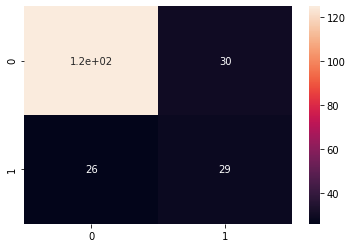

In [251]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

In [252]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       155
         1.0       0.49      0.53      0.51        55

    accuracy                           0.73       210
   macro avg       0.66      0.67      0.66       210
weighted avg       0.74      0.73      0.74       210



In [253]:
 print ('Best auc on training set: ', clf.best_score_)
 print ('Best auc on test set: ', clf.score(x_test, y_test))

Best auc on training set:  0.8564080459770114
Best auc on test set:  0.7333333333333333


In [254]:
y=clf.predict([[41,3,17,12,176,9.3,11.359392,5.008608]])
print(y)

[1.]
